# Salary of Software Professionals

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Introduction
The following data set was procured from Kaggle and contains more than 22,000 instances of salary information for software professionals in India in the year 2022. We will explore the data further in subsequent stages and develop insights as we progress. 

In [4]:
df = pd.read_csv("Salary_Dataset_with_Extra_Features.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
df.shape

(22770, 8)

After we imported the data using Pandas "read_csv" funtion, we notice that there are 8 features. Also, we discovered by using Pandas "shape" method that there are exactly 22,770 observations. From the source of the data (https://www.kaggle.com/datasets/iamsouravbanerjee/software-professional-salaries-2022), we collected some information to better explain the features. We will discuss the details in the next section where we look at the data type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [7]:
df.dtypes

Rating               float64
Company Name          object
Job Title             object
Salary                 int64
Salaries Reported      int64
Location              object
Employment Status     object
Job Roles             object
dtype: object

When we apply the "info" method on the dataframe, the first thing we notice that every feature has 22,770 non-null values. This implies there are no missing values in the dataset. We also notice that data that intuitively appear to be numeric are saved in either float format (e.g. Rating) or integers (e.g. Salay and Salary Reported-which means number of employees who reported their salaries). The other features like Company Name, Job Title, Location, Employment Status and Job Roles are stored in string format.

In [8]:
df.describe(include=["object", "float", "int64"]).transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rating,22770.0,NaN,NaN,NaN,3.918213,0.519675,1.0,3.7,3.9,4.2,5.0
Company Name,22770,11261,Tata Consultancy Services,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Title,22770,1080,Software Development Engineer,2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,22770.0,NaN,NaN,NaN,695387.211243,884399.013676,2112.0,300000.0,500000.0,900000.0,90000000.0
Salaries Reported,22770.0,NaN,NaN,NaN,1.855775,6.823668,1.0,1.0,1.0,1.0,361.0
Location,22770,10,Bangalore,8264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,22770,4,Full Time,20083,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job Roles,22770,11,SDE,8183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

### DATA Description

#### Rating

In [10]:
df["Rating"].value_counts().iloc[:11]

4.0    2895
3.9    2473
3.8    2471
4.1    2111
3.7    1479
4.2    1323
4.3    1294
3.6    1009
4.4     883
4.5     861
3.5     801
Name: Rating, dtype: int64

In [11]:
np.sort(df["Rating"].unique())

array([1.  , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.  , 2.1 , 2.2 ,
       2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.  , 3.1 , 3.2 , 3.3 ,
       3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.1 , 4.2 ,
       4.3 , 4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.  ])

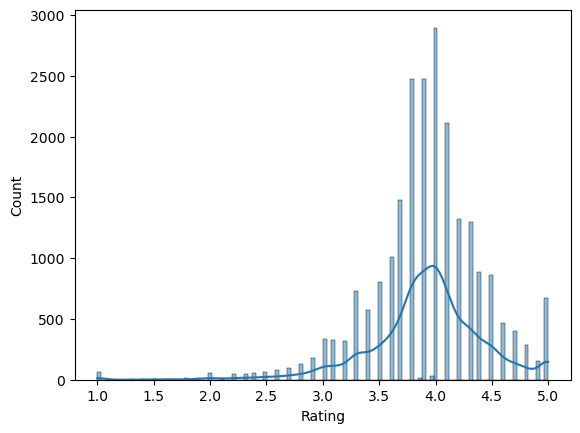

In [12]:
sns.histplot(data=df, x="Rating", kde=True);

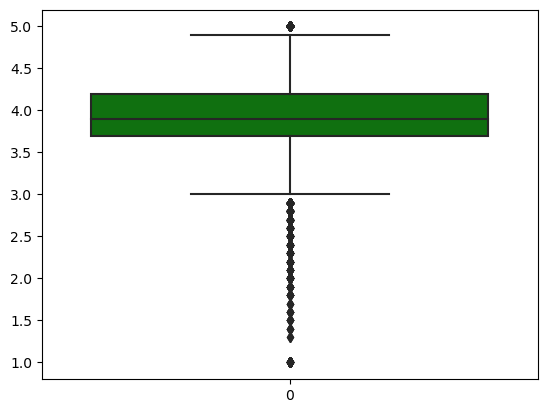

In [13]:
sns.boxplot(df["Rating"], color="g");

The feature Rating implies the rating provided to the company by its employees in a scale of 1 to 5, with 5 being the highest. We used the value_counts function of Pandas and chained with the iloc function to check the 10 most frequenty provided ratings. We also used the series.unique function to generate a list of all the unique ratings. We found that the data is consistent with our background knowledge of the feature. This information can also be derived from the relevant output of dataframe.describe function. 

Finally, we created a histogram to see the shape of the distribution of ratings. It turns out the distribution is negatively skewed (left skewed) and, hence, there may be some outliers towards the lower end of values of the ratings.

In [14]:
df["Company Name"].value_counts().iloc[:11]

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
Wipro                             122
IBM                               122
HCL Technologies                  102
Capgemini                         101
Fresher                           101
Microsoft                          96
Name: Company Name, dtype: int64

In [15]:
df["Company Name"].nunique()

11261

"Company Name" is a categorical feature and shows the names of various companies whose employees have reported the data we are working with. Using the value_count function, we can the frequency count of the top 10 companies. Also, we used the nunique() function to look at the number of unique companies. There are more than 11,000 companies.

In [16]:
df["Job Title"].value_counts().iloc[:11]

Software Development Engineer                   2351
Android Developer                               2029
Software Development Engineer (SDE)             1614
Front End Developer                             1412
Test Engineer                                   1314
Web Developer                                    853
Software Development Engineer - Intern           771
Software Development Engineer In Test (SDET)     766
Backend Developer                                534
Python Developer                                 485
IOS Developer                                    484
Name: Job Title, dtype: int64

In [17]:
df["Job Title"].nunique()

1080

Job Title is another categorical feature and has 1080 unique values. 

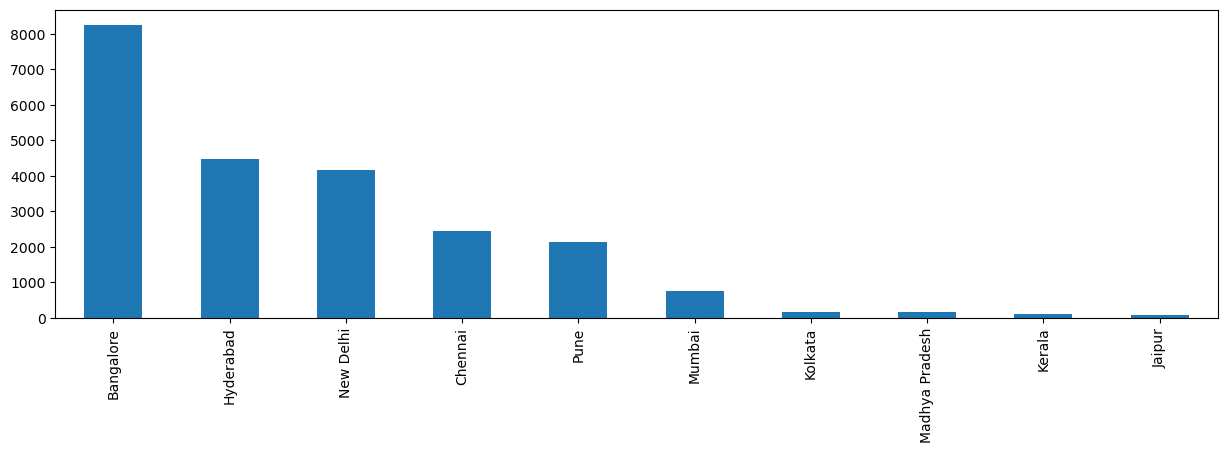

In [18]:
df["Location"].value_counts().plot(kind='bar', figsize=(15, 4));

The location feature shows that cities from where the employees have reported their salary amounts. By using the value_count function on the location feature, and chaining it with the plot function, we created a barplot showing the location-wise frequency of the observations. We notice that Banglore has the highest number of software professionals, which makes sense the city is considered the IT hub of India. 

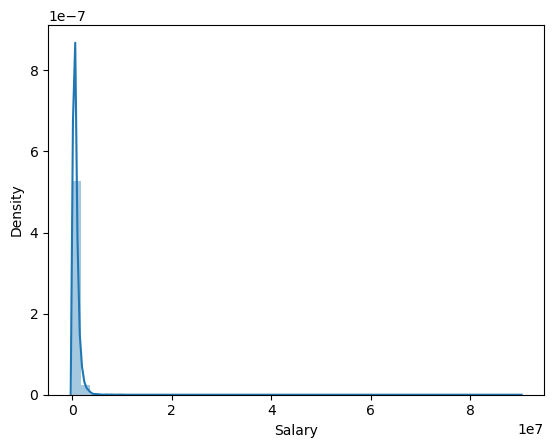

In [19]:
# plt.figure(figsize=(15, 4))
sns.distplot(df["Salary"], kde=True);

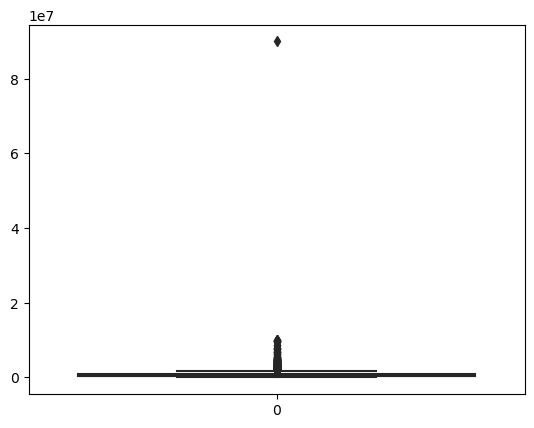

In [20]:
sns.boxplot(df["Salary"], color='g');

The salary data is expressed in integer values so it makes sense to check the distribution. We note that the data appears to highly skewed to the right (postively skewed). This is also evident from the boxplot in figure above. This also implies that there are massive outlier values, perhaps some software professionals are getting exorbitantly high salaries. 

In [21]:
df["Salaries Reported"].describe()

count    22770.000000
mean         1.855775
std          6.823668
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        361.000000
Name: Salaries Reported, dtype: float64

<AxesSubplot: xlabel='Salaries Reported', ylabel='Density'>

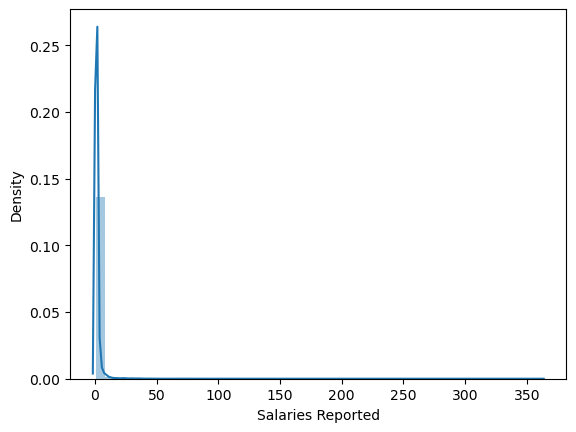

In [22]:
sns.distplot(df["Salaries Reported"], kde=True)

<AxesSubplot: >

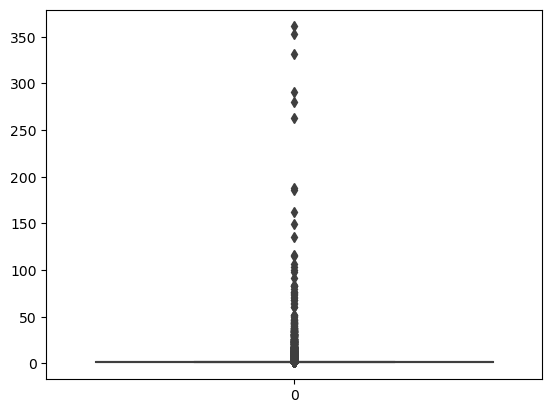

In [23]:
sns.boxplot(df["Salaries Reported"])

As discussed earlier, "Salary Reported" represents the number of people in a company who reported their salary levels. It turns out that this data is also skewed to the right and may contain some massive outliers.

In [24]:
df["Employment Status"].value_counts()

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

In [26]:
df["Employment Status"].info

<bound method Series.info of 0        Full Time
1        Full Time
2        Full Time
3        Full Time
4        Full Time
           ...    
22765    Full Time
22766    Full Time
22767    Full Time
22768    Full Time
22769    Full Time
Name: Employment Status, Length: 22770, dtype: object>

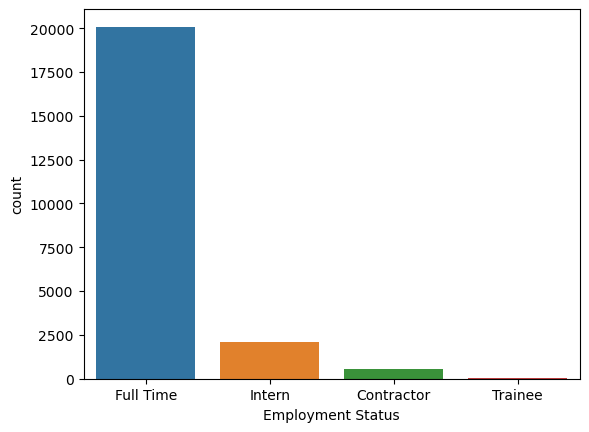

In [28]:
sns.countplot(x=df["Employment Status"]);

We can see above that "Employement Status" is a categorical variable. The countplot shows that around 20,000 employees who reported the data are working full-time. There are also around 2000 interns and a handful of contractors followed by a tiny fraction of trainees.

In [ ]:
df["Job Roles"].value_counts()

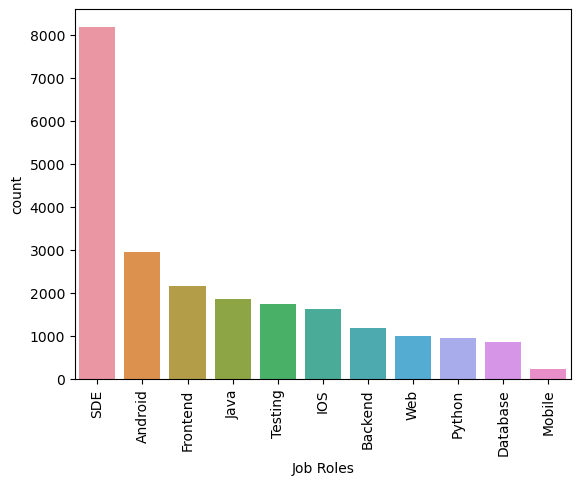

In [29]:
# plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.countplot(x=df["Job Roles"], order=df["Job Roles"].value_counts().index);

We created frequency counts of "Job Roles" and plotted them using the countplot function of the Seaborn Library. It turn out Software Development Engineer is the most frequently occurring observation in the dataset, around 8000 of them. This is followed by Android developer (nearly 3000) and frontend developers (around 2500) and testers. Mobile developers represent a tiny fraction of the entire dataset 

## Bivariate Analysis

<AxesSubplot: >

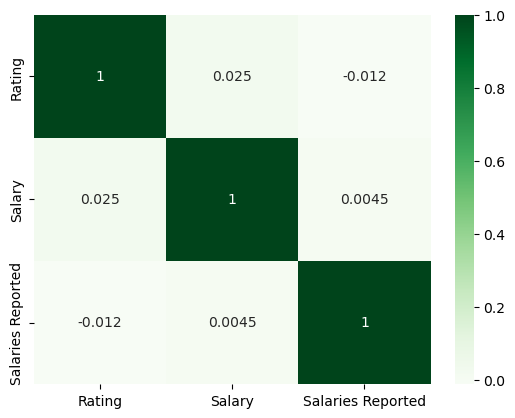

In [30]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")

<AxesSubplot: xlabel='Rating', ylabel='Salary'>

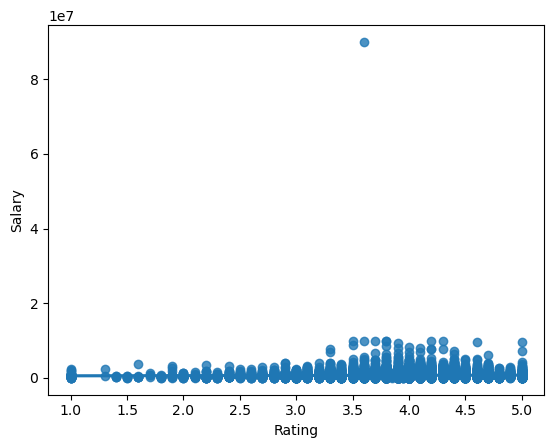

In [31]:
sns.regplot(data=df, x="Rating", y="Salary", fit_reg=True)

In [32]:
df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


#### Salary by job roles

In [33]:
df_meanSalaries = df.groupby("Job Roles").mean()['Salary'].to_frame()
df_meanSalaries.reset_index(inplace=True)
df_meanSalaries

,Job Roles,Salary
0,Android,565911.003056
1,Backend,748518.164154
2,Database,958584.046243
3,Frontend,610098.699954
4,IOS,695254.248927
5,Java,564709.907427
6,Mobile,882282.971429
7,Python,486022.791975
8,SDE,853794.522302
9,Testing,496298.188506


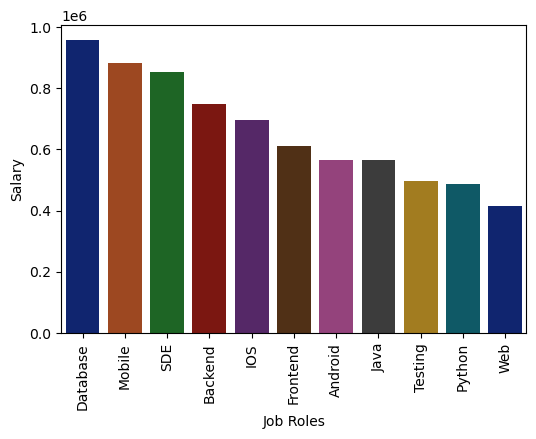

In [34]:
plt.figure(figsize=(6, 4))
plt.yticks()
plt.xticks(rotation=90)

sns.barplot(data=df_meanSalaries.sort_values(by = "Salary", ascending=False), x="Job Roles", y="Salary", palette="dark")
plt.show()

WE note from the above graphs that Android developers make the highest average salaries followed by Backend and Database developers. On the other hand, Web developers, testers and Software Development Engineers are at the bottom of the average salary scale. This information could be used to triangulate the results of the regressions that we will be doing subsequently. 

#### Average Salary by Employment status

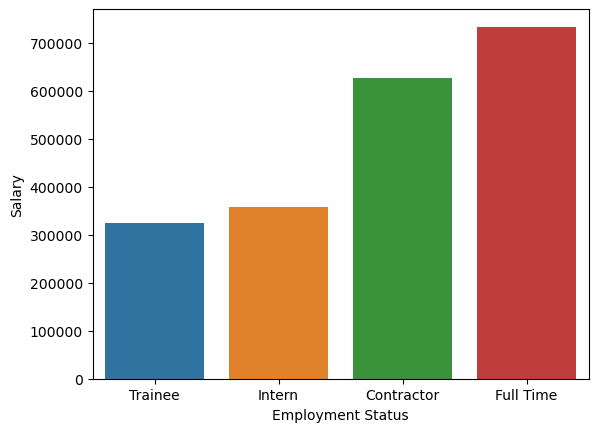

In [35]:
df_status = df.groupby("Employment Status").mean()
df_status.reset_index(inplace=True)
sns.barplot(data=df_status.sort_values(by="Salary"), x="Employment Status", y="Salary", ci=False)
plt.show()

From the above graph, we can see that contractors tend to make the highest number of average salaries. This makes sense because typically contractors are hired for a shorter duration but are remunerated handsomely to compensate for the short employment contracts. Full-time employees, though paid less than the contractors, but make still higher average incomes than Interns or Trainees. 

#### Average Salaries by Location

In [36]:
df1=df.groupby('Location').mean()
# df1['Mean Salary']=df1['Total Salary']/df1['Salaries Reported']
df1.reset_index(inplace=True)
df1.sort_values(by="Salary",ascending=False,inplace=True)
df1.head()

,Location,Rating,Salary,Salaries Reported
7,Mumbai,3.881709,961180.368491,1.297730
0,Bangalore,3.920232,735344.739593,2.314134
5,Kolkata,4.024719,710925.573034,1.359551
9,Pune,3.886082,690476.311153,1.280694
2,Hyderabad,3.914484,679099.157376,2.053727


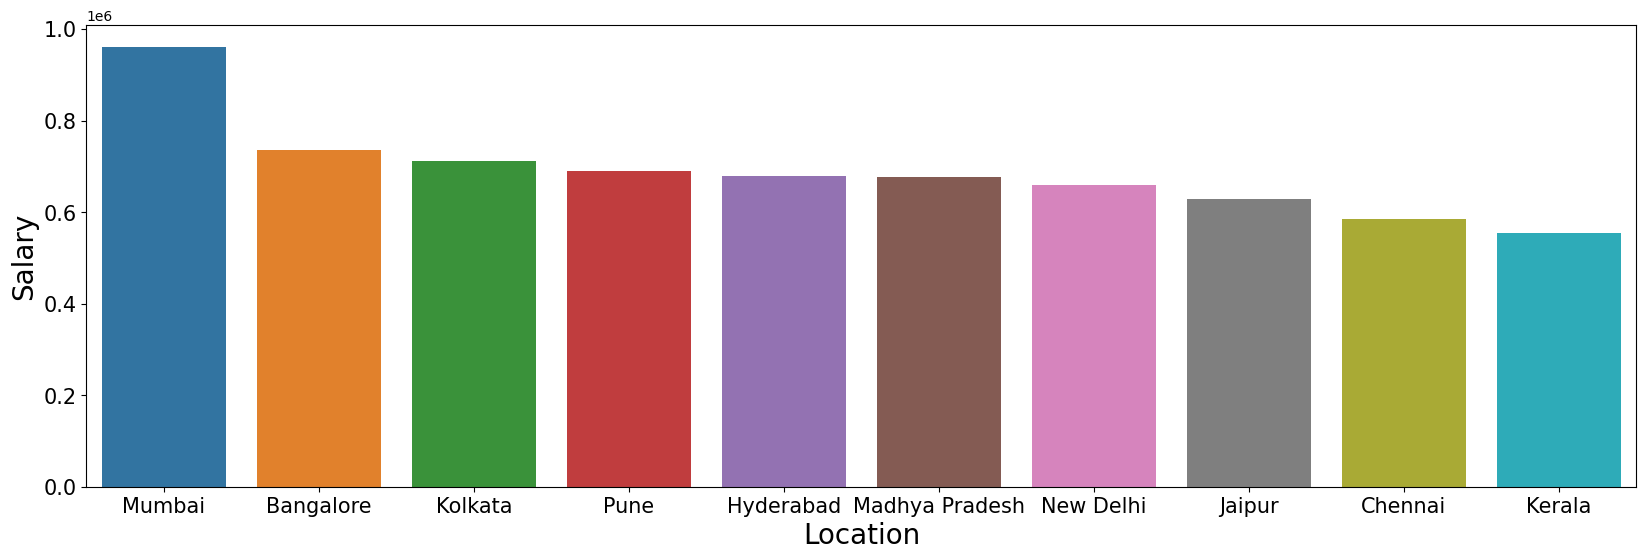

In [37]:
plt.figure(figsize = (20, 6))
plt.xlabel("Average Salary", fontsize=20)
plt.ylabel("Location", fontsize=20)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
sns.barplot(data=df1, x = "Location", y = "Salary", palette ='tab10');

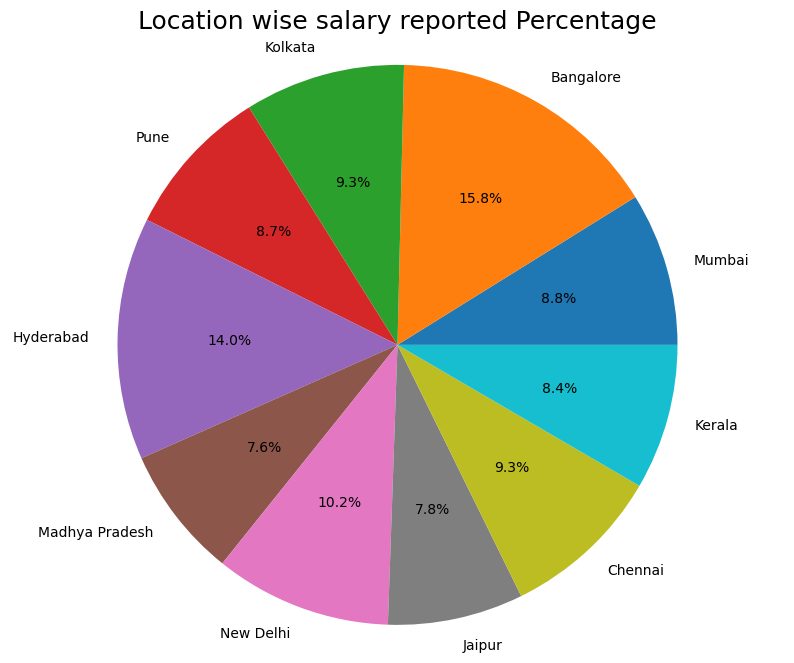

In [38]:
plt.figure(figsize=(10,8))
plt.pie(df1['Salaries Reported'],labels=df1['Location'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Location wise salary reported Percentage',fontsize=18)
plt.show()

In [39]:
df2 = df.groupby("Job Roles").sum().reset_index()

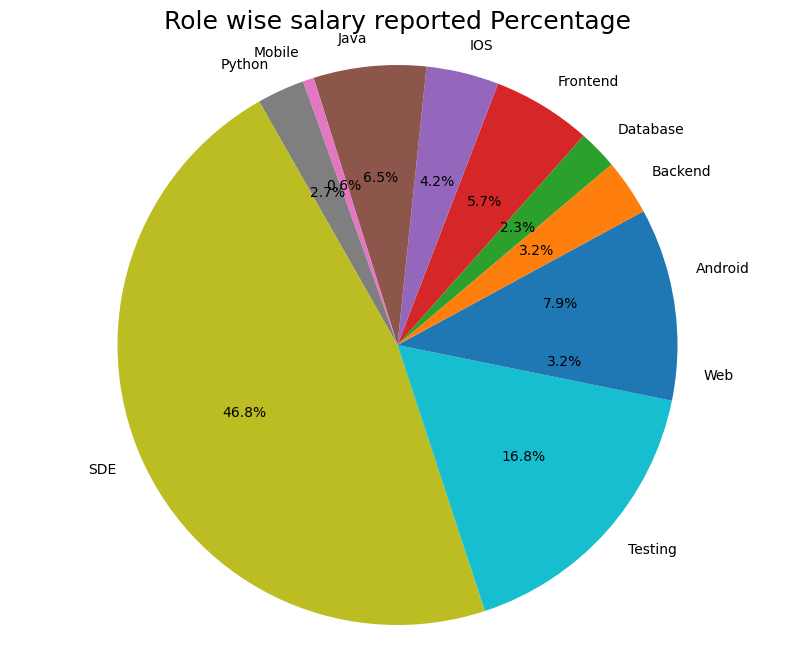

In [40]:
plt.figure(figsize=(10,8))
plt.pie(df2['Salaries Reported'],labels=df2['Job Roles'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Role wise salary reported Percentage',fontsize=18)
plt.show()

We tried to see the relation between company ratings and salary, and found no association. Even when we scaled the salary between 1 and 5 to match range of Ratings, there is still no association. 

As we can see, there is very little association across the numerical variables. This is an interesting background background information that we can later use to triangulate the regression results

## Data Pre-Processing

### Outlier Detection and Treatment

In [41]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [42]:
df['Salary'].describe()

count    2.277000e+04
mean     6.953872e+05
std      8.843990e+05
min      2.112000e+03
25%      3.000000e+05
50%      5.000000e+05
75%      9.000000e+05
max      9.000000e+07
Name: Salary, dtype: float64

In [43]:
Q1 = np.percentile(df['Salary'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Salary'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['Salary'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Salary'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (22770, 8)
New Shape:  (21459, 8)


### Data Cleaning

In [44]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


<AxesSubplot: xlabel='Salary', ylabel='Count'>

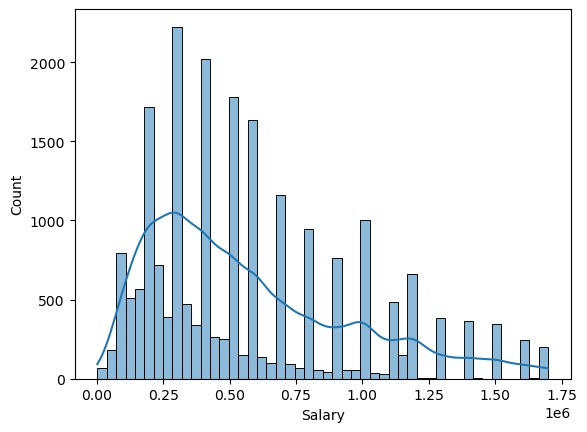

In [45]:

sns.histplot(df["Salary"], kde=True)

<AxesSubplot: xlabel='Salary', ylabel='Count'>

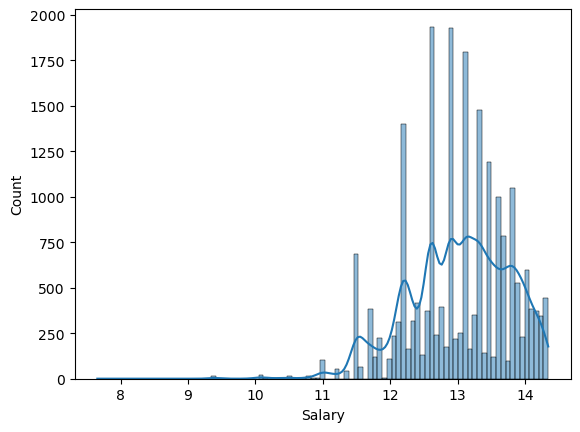

In [46]:
df["Salary"] = np.log(df["Salary"])
sns.histplot(df["Salary"], kde=True)

In [47]:
df_copy = df.copy()

In [48]:
df_copy.drop(columns="Salaries Reported", inplace=True)

In [51]:
df_copy.head()

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,12.899220,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,12.899220,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,13.815511,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,12.611538,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,13.304685,Bangalore,Full Time,Android


### Doing Target Encoding

In [52]:
from category_encoders import TargetEncoder

In [53]:
encoder = TargetEncoder()

In [54]:
df_copy['Company Name'] = encoder.fit_transform(df_copy['Company Name'], df_copy['Salary'])
df_copy['Job Title'] = encoder.fit_transform(df_copy['Job Title'],df_copy['Salary'])
df_copy['Location'] = encoder.fit_transform(df_copy['Location'], df_copy['Salary'])
df_copy['Job Roles'] = encoder.fit_transform(df_copy['Job Roles'], df_copy['Salary'])
df_copy['Employment Status'] = encoder.fit_transform(df_copy['Employment Status'], df_copy['Salary'])

In [55]:
df_copy.head()

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles
0,3.8,13.019408,12.855459,12.899220,13.0475,13.084556,12.873563
1,4.5,13.002020,12.855459,12.899220,13.0475,13.084556,12.873563
2,4.0,13.104299,12.855459,13.815511,13.0475,13.084556,12.873563
3,3.8,12.964590,12.855459,12.611538,13.0475,13.084556,12.873563
4,4.4,13.079956,12.855459,13.304685,13.0475,13.084556,12.873563


<AxesSubplot: >

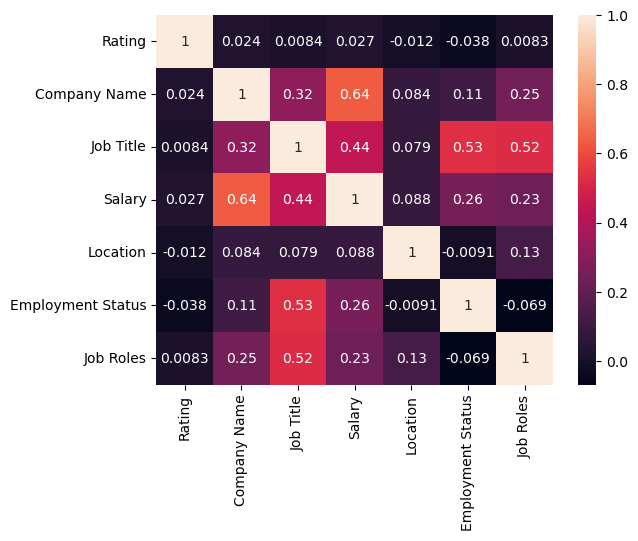

In [56]:
sns.heatmap(df_copy.corr(),annot=True)

## Feature Enriching
#### Creating clusters

In [57]:
from sklearn.cluster import KMeans

In [58]:
clusters = range(3, 7)

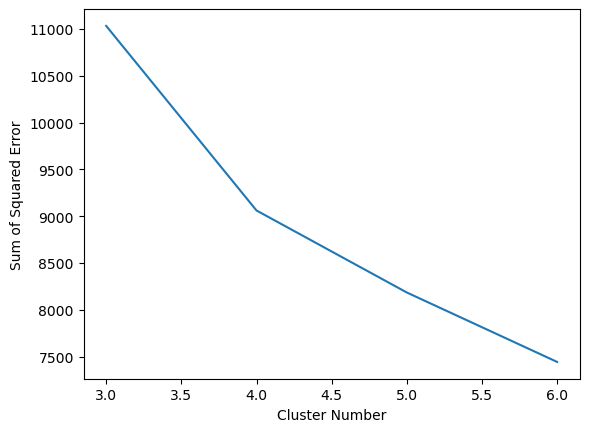

In [59]:
sse = []
for c in clusters:
    cluster = KMeans(n_clusters=c)
    cluster.fit_predict(df_copy)
    sse.append(cluster.inertia_)
    
plt.xlabel("Cluster Number")
plt.ylabel("Sum of Squared Error")
plt.plot(clusters, sse)
plt.show()

As we can see, the elbow method suggests that 3 is the optimal number of clusters

In [60]:
cluster = KMeans(n_clusters=4)
df_copy["group"]= cluster.fit_predict(df_copy)

In [61]:
df_copy.head()

,Rating,Company Name,Job Title,Salary,Location,Employment Status,Job Roles,group
0,3.8,13.019408,12.855459,12.899220,13.0475,13.084556,12.873563,2
1,4.5,13.002020,12.855459,12.899220,13.0475,13.084556,12.873563,2
2,4.0,13.104299,12.855459,13.815511,13.0475,13.084556,12.873563,1
3,3.8,12.964590,12.855459,12.611538,13.0475,13.084556,12.873563,2
4,4.4,13.079956,12.855459,13.304685,13.0475,13.084556,12.873563,2


## Creating Features and Target

In [62]:
x = df_copy.drop(columns="Salary")
y = df_copy["Salary"]
x

,Rating,Company Name,Job Title,Location,Employment Status,Job Roles,group
0,3.8,13.019408,12.855459,13.0475,13.084556,12.873563,2
1,4.5,13.002020,12.855459,13.0475,13.084556,12.873563,2
2,4.0,13.104299,12.855459,13.0475,13.084556,12.873563,1
3,3.8,12.964590,12.855459,13.0475,13.084556,12.873563,2
4,4.4,13.079956,12.855459,13.0475,13.084556,12.873563,2
...,...,...,...,...,...,...,...
22765,4.7,12.911835,12.717556,13.0475,13.084556,12.643983,0
22766,4.0,12.964590,12.717556,13.0475,13.084556,12.643983,2
22767,4.1,12.607015,12.928171,13.0475,13.084556,12.643983,0
22768,4.1,13.102755,12.928171,13.0475,13.084556,12.643983,2


In [63]:
x.shape, y.shape

((21459, 7), (21459,))

### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
x = scaler.fit_transform(x)

In [67]:
# y = scaler.fit_transform(y.values.reshape(-1, 1))

In [68]:
y.shape

(21459,)

In [69]:
x.shape

(21459, 7)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
regressor = LinearRegression()

In [74]:
regressor.fit(x_train, y_train)

LinearRegression()

In [75]:
y_predicted = regressor.predict(x_test)

#### Linear Regression Evaluation

In [76]:
from sklearn.metrics import r2_score, mean_squared_error

In [77]:
r2_score(y_test, y_predicted)

0.5174092315283431